In [1]:
import csv
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
import warnings
import os
import seaborn as sns
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('./data/city_day.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


# 1. Exploring the data

In [4]:
def getDurationOfData(data):
    print('DURATION OF DATA:\nThe data is between', data['Date'].min(), 'and' , data['Date'].max())

getDurationOfData(data)

DURATION OF DATA:
The data is between 2015-01-01 and 2020-07-01


In [5]:
def getCities(data):
    cities = data['City'].value_counts().to_frame()
    print('CITIES COVERED IN THE DATA:')
    print('Total number of cities in the dataset :', len(cities))
    cities = cities.sort_index().index
    for i in cities:
        print(i)
getCities(data)

CITIES COVERED IN THE DATA:
Total number of cities in the dataset : 26
Ahmedabad
Aizawl
Amaravati
Amritsar
Bengaluru
Bhopal
Brajrajnagar
Chandigarh
Chennai
Coimbatore
Delhi
Ernakulam
Gurugram
Guwahati
Hyderabad
Jaipur
Jorapokhar
Kochi
Kolkata
Lucknow
Mumbai
Patna
Shillong
Talcher
Thiruvananthapuram
Visakhapatnam


# 2. Merging Columns and finding Max Polluted city

In [6]:
#merging columns
def mergeColumns(data):
    data['Date'] = pd.to_datetime(data['Date'])
    data['BTX'] = data['Benzene'] + data['Toluene'] + data['Xylene']
    data.drop(['Benzene','Toluene','Xylene'], axis=1)
    return data

data=mergeColumns(data)

In [7]:
def subsetColumns(data):
    pollutants = ['PM2.5', 'PM10', 'NO2', 'CO','SO2', 'O3', 'BTX']
    columns =  ['City', 'AQI', 'AQI_Bucket'] + pollutants
    all_columns = ['Date'] + columns
    data = data[all_columns]
    print(data.columns)
    return data, columns, pollutants
data, columns, pollutants = subsetColumns(data)

Index(['Date', 'City', 'AQI', 'AQI_Bucket', 'PM2.5', 'PM10', 'NO2', 'CO',
       'SO2', 'O3', 'BTX'],
      dtype='object')


In [8]:
data

,Date,City,AQI,AQI_Bucket,PM2.5,PM10,NO2,CO,SO2,O3,BTX
0,2015-01-01,Ahmedabad,NaN,NaN,NaN,NaN,18.22,0.92,27.64,133.36,0.02
1,2015-01-02,Ahmedabad,NaN,NaN,NaN,NaN,15.69,0.97,24.55,34.06,12.95
2,2015-01-03,Ahmedabad,NaN,NaN,NaN,NaN,19.30,17.40,29.07,30.70,25.45
3,2015-01-04,Ahmedabad,NaN,NaN,NaN,NaN,18.48,1.70,18.59,36.08,15.57
4,2015-01-05,Ahmedabad,NaN,NaN,NaN,NaN,21.42,22.10,39.33,39.31,28.68
...,...,...,...,...,...,...,...,...,...,...,...
29526,2020-06-27,Visakhapatnam,41.0,Good,15.02,50.94,25.06,0.47,8.55,23.30,15.04
29527,2020-06-28,Visakhapatnam,70.0,Satisfactory,24.38,74.09,26.06,0.52,12.72,30.14,3.33
29528,2020-06-29,Visakhapatnam,68.0,Satisfactory,22.91,65.73,29.53,0.48,8.42,30.96,0.02
29529,2020-06-30,Visakhapatnam,54.0,Satisfactory,16.64,49.97,29.26,0.52,9.84,28.30,0.00


In [9]:
def max_polluted_city(pollutant, data):
    x1 = data[[pollutant,'City']].groupby(["City"]).mean().sort_values(by=pollutant,ascending=False).reset_index()
    x1[pollutant] = round(x1[pollutant],2)
    return x1[:10].style.background_gradient(cmap='coolwarm')

pm25 = max_polluted_city('PM2.5', data)
pm10 = max_polluted_city('PM10', data)
no2 = max_polluted_city('NO2', data)
so2 = max_polluted_city('SO2', data)
co = max_polluted_city('CO', data)
o3 = max_polluted_city('O3', data)
btx = max_polluted_city('BTX', data)
aqi = max_polluted_city('AQI', data)

In [10]:
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.render()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

# 3. Getting Delhi Data

## a. Visualising entire Delhi data

In [11]:
delhi_data = data[data['City']=='Delhi']
delhi_data.set_index('Date',inplace=True, drop = False)

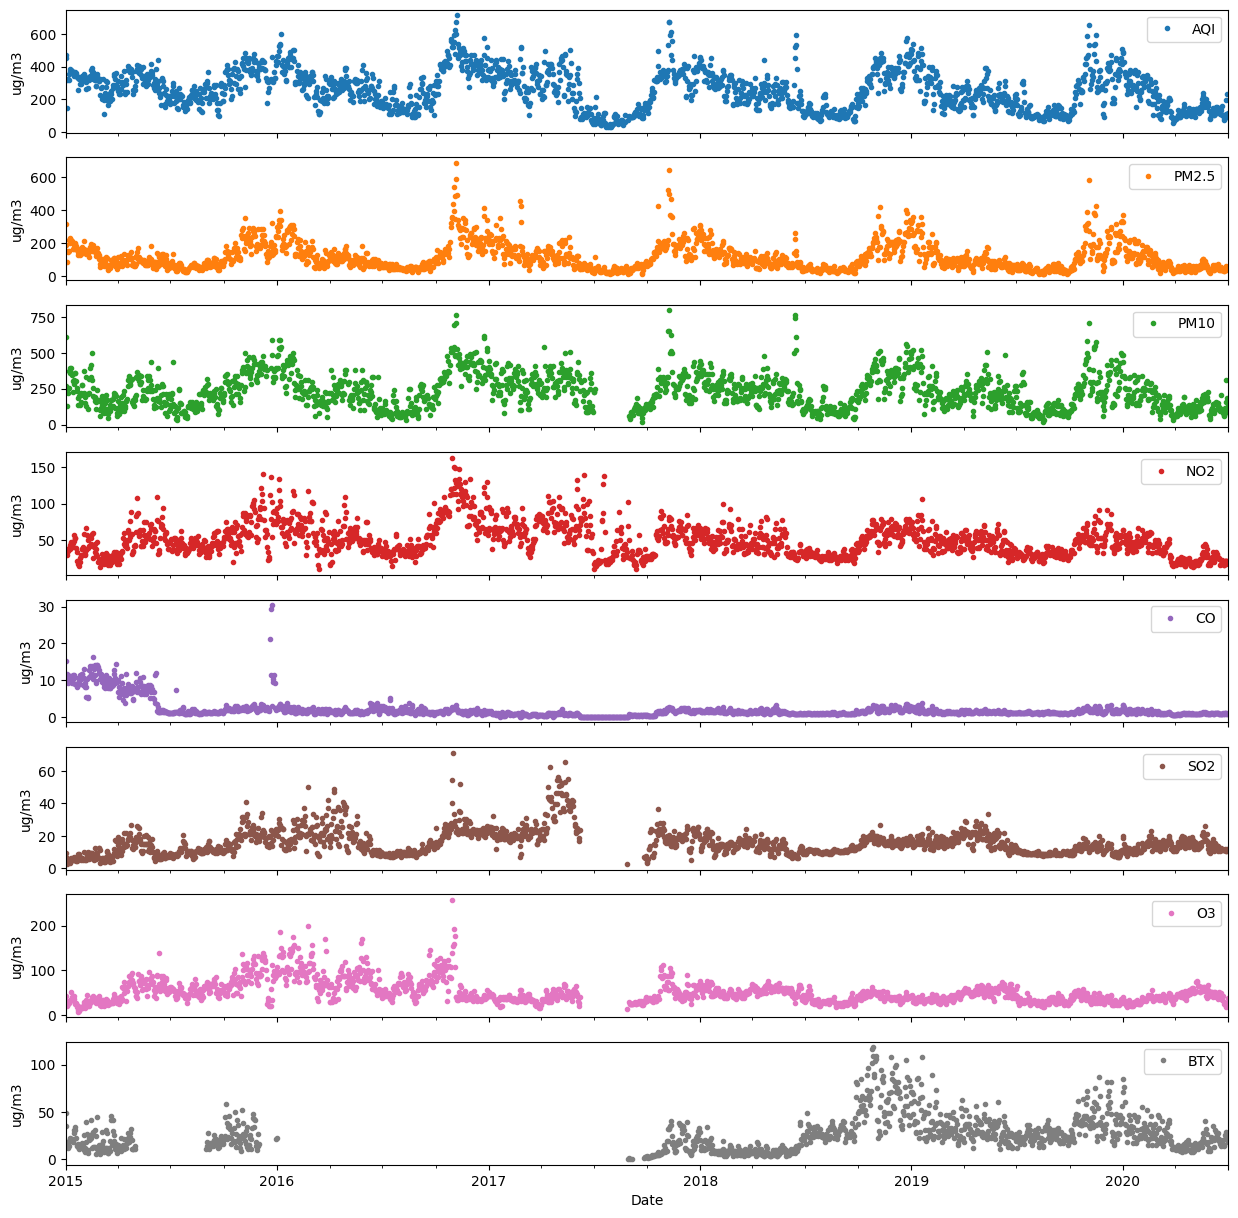

In [12]:
def getEntireDataPlot(delhi_data):
    axes = delhi_data[columns].plot(marker='.', linestyle='None', figsize=(15, 15), subplots=True)
    for ax in axes:
        ax.set_xlabel('Date')
        ax.set_ylabel('ug/m3')

getEntireDataPlot(delhi_data)

## b. Visualising the amount of pollutants in air and AQI over the years and months

In [13]:
def trend_plot(delhi_data):
    delhi_data['Year'] = [d.year for d in delhi_data.Date]
    delhi_data['Month'] = [d.strftime('%b') for d in delhi_data.Date]
    years = delhi_data['Year'].unique()
    for value in pollutants:
        fig, axes = plt.subplots(1, 2, figsize=(12,3), dpi= 80)
        sns.boxplot(x='Year', y=value, data=delhi_data, ax=axes[0])
        sns.pointplot(x='Month', y=value, data=delhi_data.loc[~delhi_data.Year.isin([2015, 2020]), :])

        axes[0].set_title('Year-wise Plot i.e. the trend', fontsize=18); 
        axes[1].set_title('Month-wise Plot i.e. the seasonality', fontsize=18)
        plt.show()

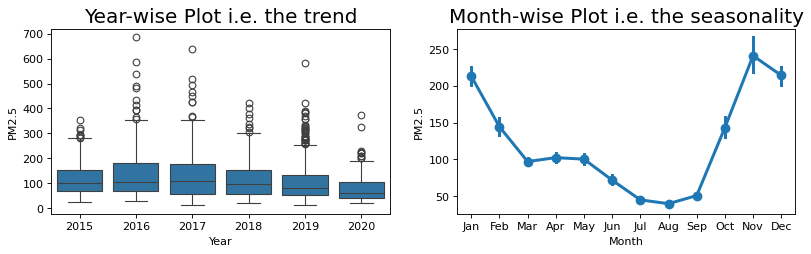

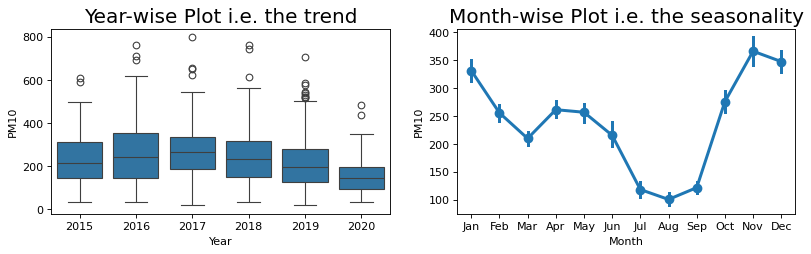

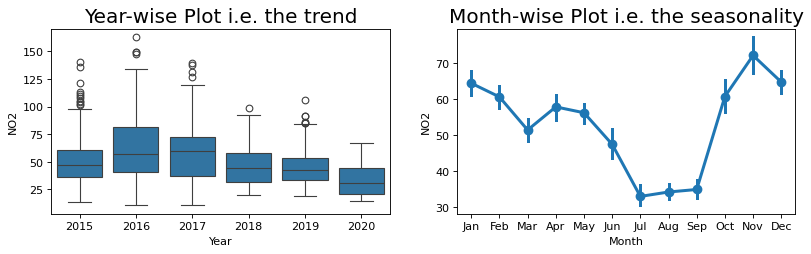

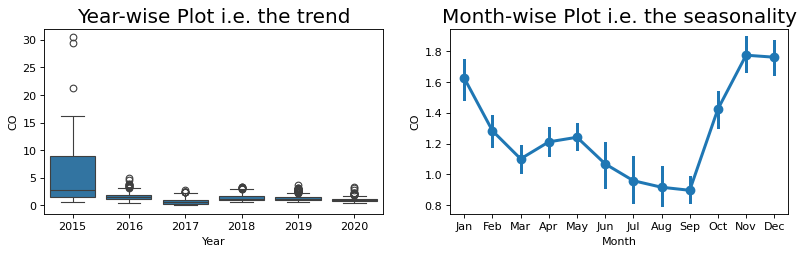

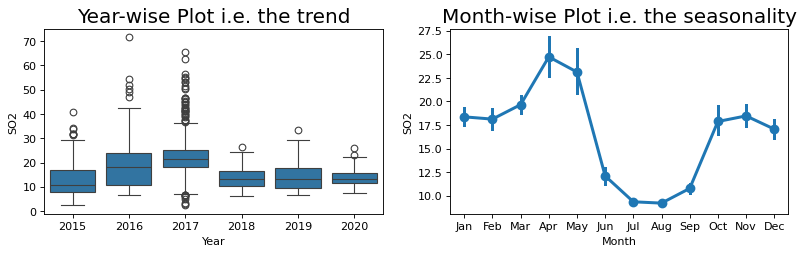

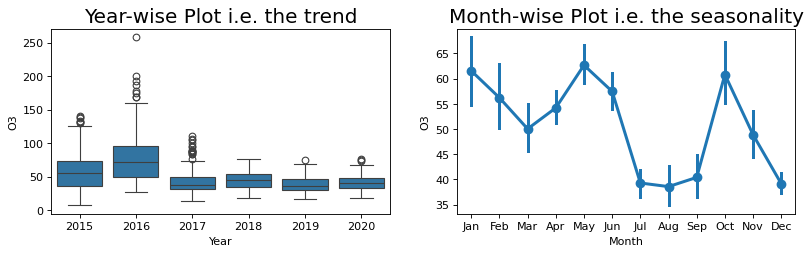

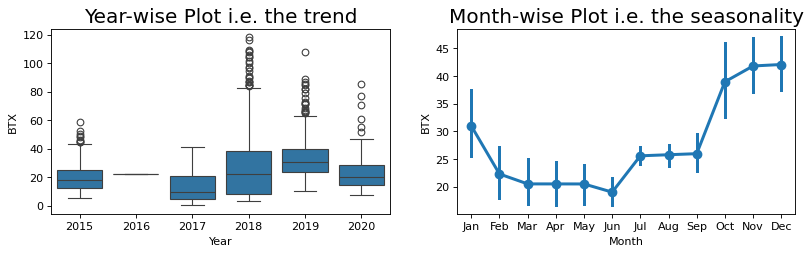

In [14]:
trend_plot(delhi_data)

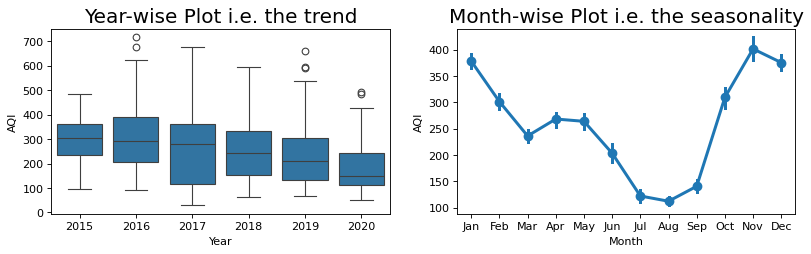

In [15]:
def getAQITrend(delhi_data):
    fig, axes = plt.subplots(1, 2, figsize=(12,3), dpi= 80)
    sns.boxplot(x='Year', y='AQI', data=delhi_data, ax=axes[0])
    sns.pointplot(x='Month', y='AQI', data=delhi_data.loc[~delhi_data.Year.isin([2015, 2020]), :])

    axes[0].set_title('Year-wise Plot i.e. the trend', fontsize=18); 
    axes[1].set_title('Month-wise Plot i.e. the seasonality', fontsize=18)
    plt.show()

getAQITrend(delhi_data)

## c. AQI and pollutant concentrations of Delhi in last two years

In [16]:
def getColorBar(AQI_pivot):
    col = []
    for val in AQI_pivot:
        if val < 50:
            col.append('#4575b4')
        elif val > 50 and val < 101:
            col.append('#91bfdb') #cornflowerblue
        elif val > 100 and val < 201:
            col.append('#e0f3f8')
        elif val > 200 and val < 301:
            col.append('#fee090')
        elif val > 300 and val < 401:
            col.append('#fc8d59')
        else:
            col.append('#d73027')
    return col

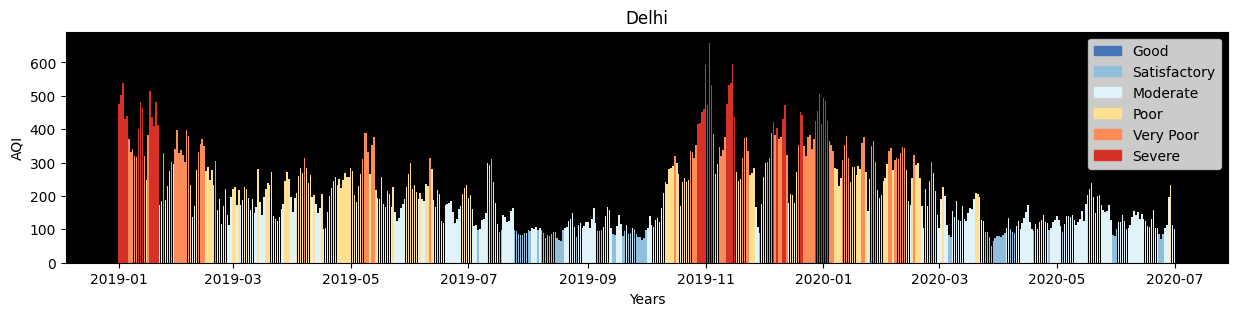

In [17]:
def getAQILastTwoYears(delhi_data):
    filtered_city_day = delhi_data[delhi_data['Date'] >= '2019-01-01']
    AQI = filtered_city_day['AQI']
    AQI.fillna(method='bfill',inplace=True)
    de = getColorBar(AQI)

    colors = {'Good':'#4575b4', 'Satisfactory':'#91bfdb', 'Moderate':'#e0f3f8', 'Poor':'#fee090', 'Very Poor':'#fc8d59', 'Severe':'#d73027'}         
    labels = list(colors.keys())
    handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]

    f, ((ax1)) = plt.subplots(1, 1, sharex='col', sharey='row', figsize=(15,3))
    ax1.set_facecolor((0, 0, 0))
    ax1.bar(AQI.index, AQI, color = de, width = 0.75)
    ax1.legend(handles, labels, loc='upper right')
    ax1.title.set_text('Delhi')
    ax1.set_ylabel('AQI')
    ax1.set_xlabel('Years')
    
getAQILastTwoYears(delhi_data)

In [18]:
def getPollutantsLastTwoYears(delhi_data, cols, pollutant, safevalue, almostsafe):
    filtered_city_day = delhi_data[delhi_data['Date'] >= '2019-01-01']
    data_pollutants = filtered_city_day[cols]
    data_pollutants.fillna(method='bfill',inplace=True)
    col = []
    for val in data_pollutants[pollutant]:
        if val < safevalue:
            col.append('#4575b4')
        elif val < almostsafe:
            col.append('#fc8d59')
        else:
            col.append('#d73027')

    colors = {'Safe':'#4575b4', 'Almost Safe':'#fc8d59' ,'Not Safe':'#d73027'}        
    labels = list(colors.keys())
    handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]

    f, ((ax1)) = plt.subplots(1, 1, sharex='col', sharey='row', figsize=(15,3))
#     ax1.set_facecolor((0, 0, 0))
    ax1.bar(data_pollutants.index, data_pollutants[pollutant], color = col, width = 0.75)
    ax1.legend(handles, labels, loc='upper right')
    ax1.title.set_text('Delhi')
    ax1.set_ylabel(pollutant)
    ax1.set_xlabel('Years')

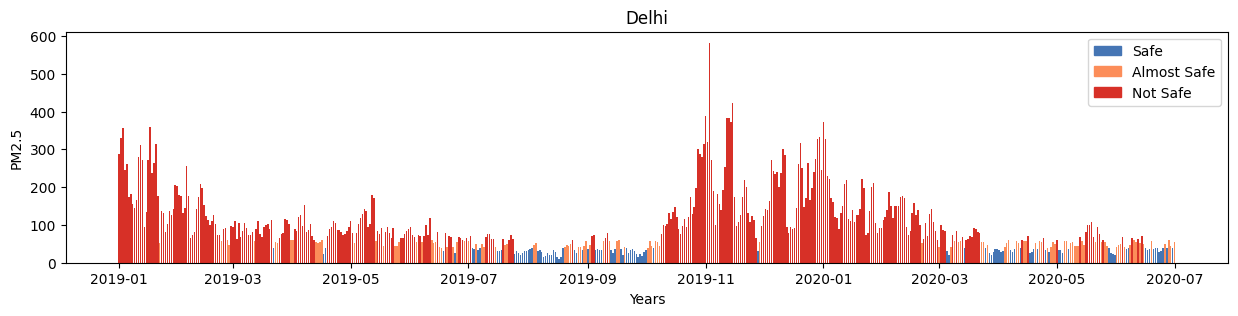

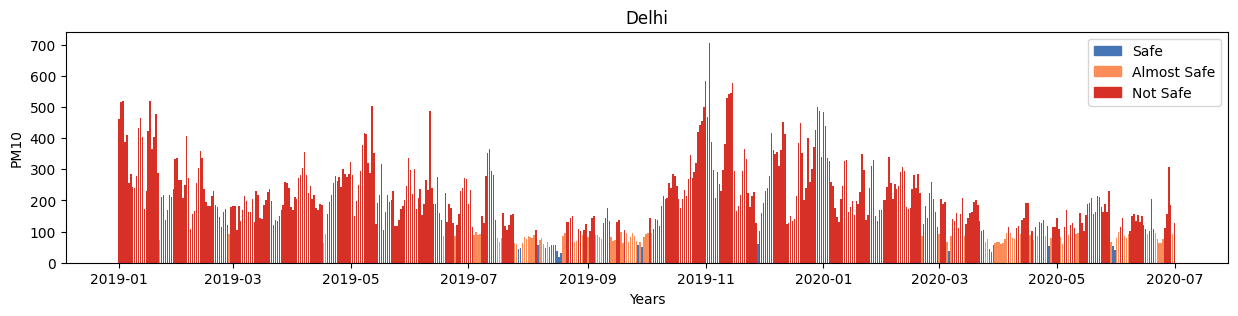

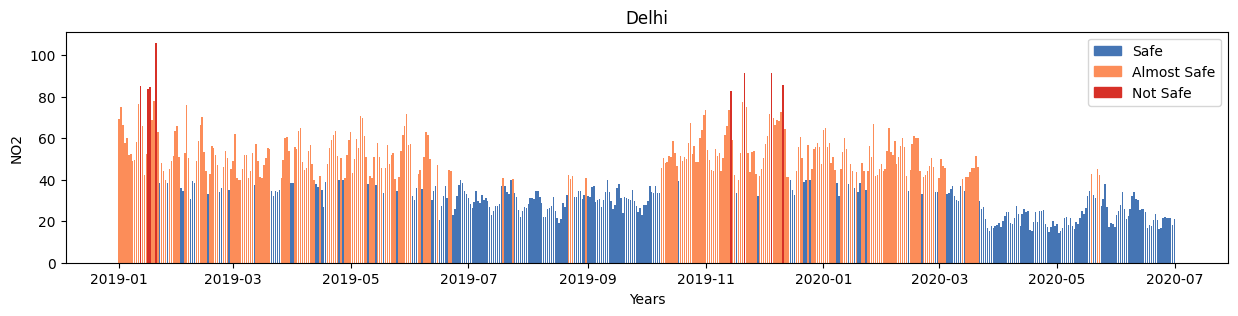

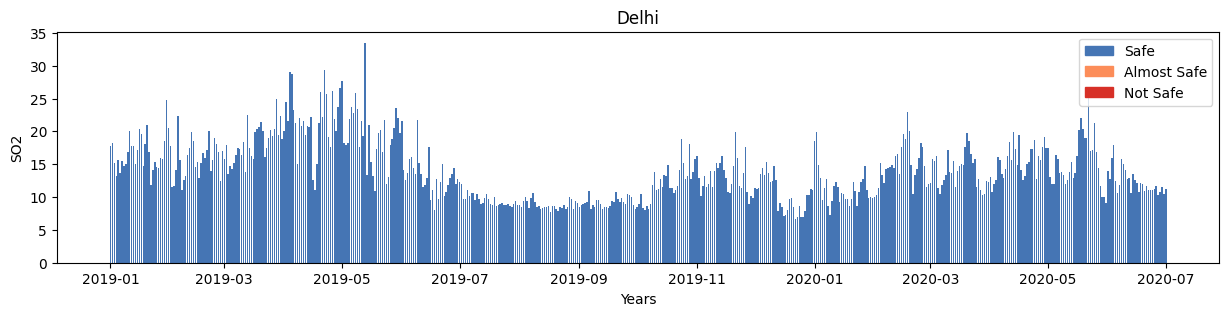

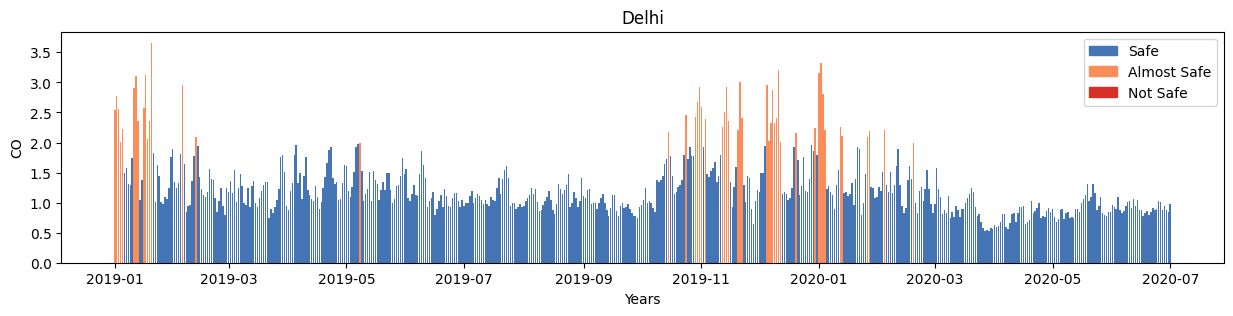

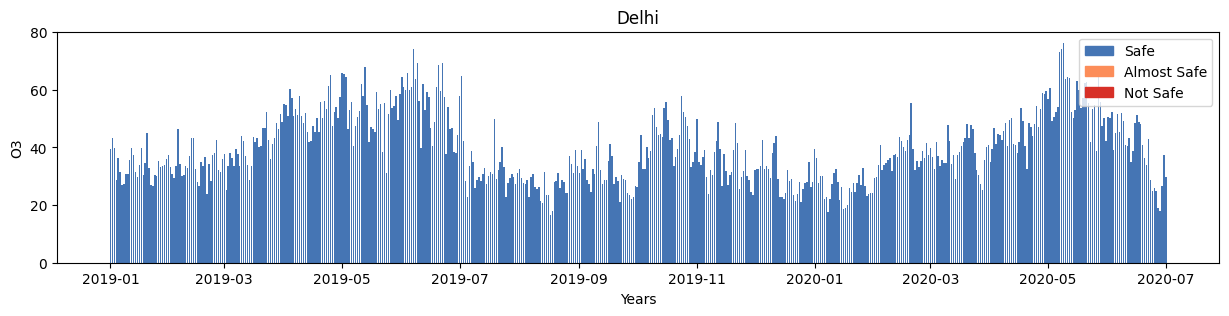

In [19]:
getPollutantsLastTwoYears(delhi_data, pollutants, 'PM2.5', 40, 60)
getPollutantsLastTwoYears(delhi_data, pollutants,'PM10', 60, 100)
getPollutantsLastTwoYears(delhi_data, pollutants,'NO2', 40, 80)
getPollutantsLastTwoYears(delhi_data, pollutants,'SO2', 50, 80)
getPollutantsLastTwoYears(delhi_data, pollutants,'CO', 2, 4)
getPollutantsLastTwoYears(delhi_data, pollutants,'O3', 100, 180)